In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv")

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터를 수집
* mem: 고객id, 최근 방문일, 사는지역, 추천여부, 주요접속채널, 쿠폰 사용 여부
* transaction: 고객id, 구매수량, 총 구매금액 정보가 있음
* 전통적 마케팅 분석 방법인 RFM 기법을 사용해 고객 데이터에서 파생변수 생성 후 분석
* Recency: 현재일 - 최근 구매일
* Frequency: 구매 빈도
* Monetary: 구매 금액

* 종속변수: conversion  => 고객이 프로모션에 반응 했는가? 1 = yes, 0 = no

In [6]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [8]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [9]:
mem.describe()

,id,recency,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000
mean,550694.137797,5.763734,0.502250,0.146781
std,259105.689773,3.507592,0.499999,0.353890
min,100001.000000,1.000000,0.000000,0.000000
25%,326772.000000,2.000000,0.000000,0.000000
50%,551300.000000,6.000000,1.000000,0.000000
75%,774914.500000,9.000000,1.000000,0.000000
max,999997.000000,12.000000,1.000000,1.000000


<Axes: >

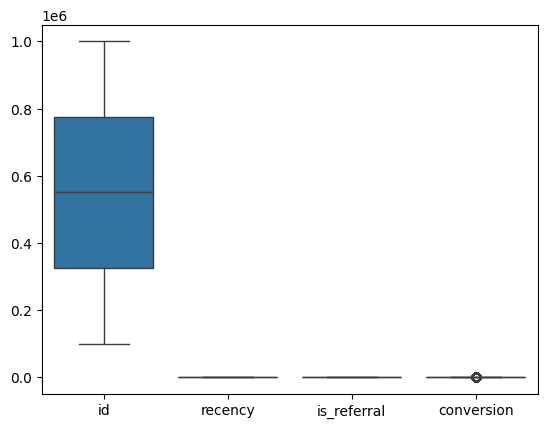

In [12]:
sns.boxplot(mem)

In [7]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [10]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [11]:
tran.describe()

,id,num_item,total_amount
count,196836.000000,196836.000000,196836.000000
mean,550557.552932,3.078365,21837.102969
std,259254.795613,1.478408,8218.005565
min,100001.000000,1.000000,8000.000000
25%,326719.000000,2.000000,15000.000000
50%,550918.000000,3.000000,22000.000000
75%,774916.000000,4.000000,29000.000000
max,999997.000000,6.000000,38000.000000


<Axes: >

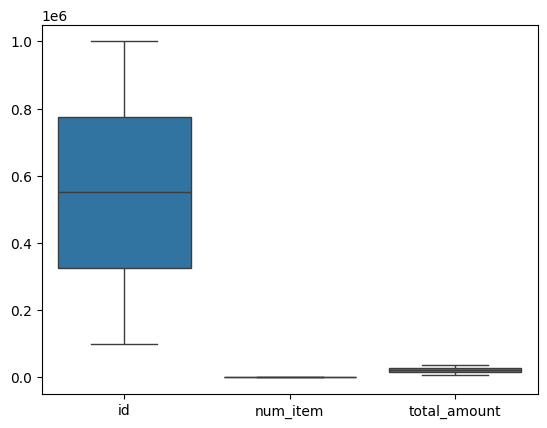

In [13]:
sns.boxplot(tran)

In [15]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [17]:
mem['id'].nunique()

64000

In [18]:
mem['recency'].describe()

count    64000.000000
mean         5.763734
std          3.507592
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: recency, dtype: float64

<Axes: xlabel='recency', ylabel='Count'>

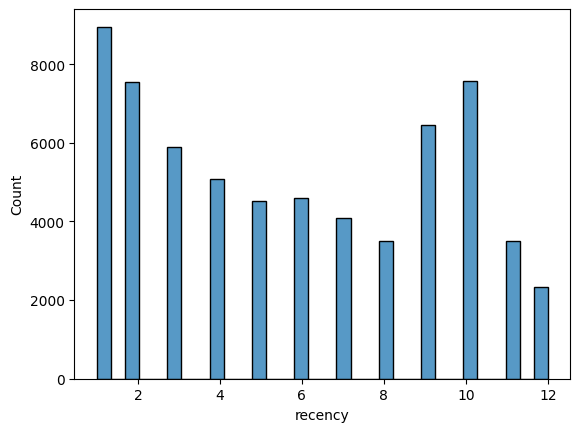

In [20]:
sns.histplot(mem['recency'])

In [21]:
mem['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [22]:
mem['is_referral'].value_counts()

is_referral
1    32144
0    31856
Name: count, dtype: int64

In [23]:
mem['channel'].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [24]:
mem['conversion'].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [25]:
9394 / (9394 +54606)

0.14678125

In [26]:
mem.groupby('recency')['conversion'].value_counts(sort=False)

recency  conversion
1        0             7224
         1             1728
2        0             6197
         1             1340
3        0             4922
         1              982
4        0             4321
         1              756
5        0             3868
         1              642
6        0             3957
         1              648
7        0             3532
         1              546
8        0             3048
         1              447
9        0             5707
         1              734
10       0             6713
         1              852
11       0             3081
         1              423
12       0             2036
         1              296
Name: count, dtype: int64

In [30]:
1728 / (1728+7224)              

0.19302949061662197

In [28]:
mem.groupby('recency')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
recency,,,,,,,,
1,8952.0,0.193029,0.394698,0.0,0.0,0.0,0.0,1.0
2,7537.0,0.177790,0.382361,0.0,0.0,0.0,0.0,1.0
3,5904.0,0.166328,0.372406,0.0,0.0,0.0,0.0,1.0
4,5077.0,0.148907,0.356032,0.0,0.0,0.0,0.0,1.0
5,4510.0,0.142350,0.349448,0.0,0.0,0.0,0.0,1.0
6,4605.0,0.140717,0.347767,0.0,0.0,0.0,0.0,1.0
7,4078.0,0.133889,0.340575,0.0,0.0,0.0,0.0,1.0
8,3495.0,0.127897,0.334023,0.0,0.0,0.0,0.0,1.0
9,6441.0,0.113957,0.317784,0.0,0.0,0.0,0.0,1.0


recency가 짧을 수록 프로모션 성공률이 높다.

In [32]:
mem.groupby('is_referral')['conversion'].value_counts()

is_referral  conversion
0            0             26343
             1              5513
1            0             28263
             1              3881
Name: count, dtype: int64

In [31]:
mem.groupby('is_referral')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
is_referral,,,,,,,,
0,31856.0,0.173060,0.378305,0.0,0.0,0.0,0.0,1.0
1,32144.0,0.120738,0.325828,0.0,0.0,0.0,0.0,1.0


In [33]:
mem.groupby('channel')['conversion'].value_counts()

channel       conversion
Multichannel  0              6429
              1              1333
Phone         0             24458
              1              3563
Web           0             23719
              1              4498
Name: count, dtype: int64

In [34]:
mem.groupby('channel')['conversion'].describe()

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
Multichannel,7762.0,0.171734,0.377173,0.0,0.0,0.0,0.0,1.0
Phone,28021.0,0.127155,0.333152,0.0,0.0,0.0,0.0,1.0
Web,28217.0,0.159407,0.366062,0.0,0.0,0.0,0.0,1.0


In [40]:
tran_total = tran.groupby('id')[['num_item', 'total_amount']].sum()
tran_total

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [37]:
tran['id'].nunique()

64000

고객의 총구매개수, 총구매액, 평균구매액 

In [42]:
tran_total['mean_amount'] = tran_total['total_amount'] / tran_total['num_item']
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428.571429
100008,5,26000,5200.000000
100032,8,62000,7750.000000
100036,15,129000,8600.000000
100070,13,85000,6538.461538
...,...,...,...
999932,5,32000,6400.000000
999981,8,91000,11375.000000
999990,9,84000,9333.333333


고객의 방문 빈도

In [45]:
frequency = tran['id'].value_counts(sort=False)

In [48]:
frequency

id
906145    3
184478    1
394235    2
130152    4
940352    1
         ..
233143    5
302540    2
362521    5
536246    4
927617    4
Name: count, Length: 64000, dtype: int64

In [46]:
tran_total['frequency'] = frequency

In [47]:
tran_total

,num_item,total_amount,mean_amount,frequency
id,,,,
100001,7,52000,7428.571429,2
100008,5,26000,5200.000000,1
100032,8,62000,7750.000000,3
100036,15,129000,8600.000000,5
100070,13,85000,6538.461538,4
...,...,...,...,...
999932,5,32000,6400.000000,1
999981,8,91000,11375.000000,4
999990,9,84000,9333.333333,3


In [ ]:
merge, join

In [51]:
mem = mem.set_index('id')

In [53]:
data = mem.join(tran_total)
data

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,104000,7428.571429,4
547316,5,Urban,1,Phone,0,9,89000,9888.888889,5
131575,6,Urban,1,Phone,0,8,61000,7625.000000,2


In [54]:
data

,recency,zip_code,is_referral,channel,conversion,num_item,total_amount,mean_amount,frequency
id,,,,,,,,,
906145,10,Surburban,0,Phone,0,10,94000,9400.000000,3
184478,6,Rural,1,Web,0,4,29000,7250.000000,1
394235,7,Surburban,1,Web,0,8,41000,5125.000000,2
130152,9,Rural,1,Web,0,7,83000,11857.142857,4
940352,2,Urban,0,Web,0,3,31000,10333.333333,1
...,...,...,...,...,...,...,...,...,...
838295,10,Urban,0,Web,0,14,104000,7428.571429,4
547316,5,Urban,1,Phone,0,9,89000,9888.888889,5
131575,6,Urban,1,Phone,0,8,61000,7625.000000,2
